In [1]:
import json
import requests
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import numpy as np


In [2]:
url = "http://hotline.whalemuseum.org/api.json?&limit=1000&page="
page = 1

In [3]:
json = []

for page in range (1,20):
    query = url + str(page)
    response = requests.get(query)
    response_json = response.json()
    json.append(response_json)

In [4]:
i=0
for i in range (0,19): 
    if i == 0:
        df = pd.DataFrame.from_dict(json_normalize(json[i]), orient = 'columns')
    else: 
        df2 = pd.DataFrame.from_dict(json_normalize(json[i]), orient = 'columns')
        df = df.append(df2)

In [12]:
df = df.reset_index()

df.head()


,id,species,quantity,description,url,latitude,longitude,location,sighted_at,created_at,updated_at,orca_type,orca_pod
0,5a049b7e686f743ec5040000,orca,5,"Spotted from the Edmonds-Kingston ferry, near ...",http://hotline.whalemuseum.org/sightings/5a049...,47.799530,-122.479967,,2017-11-09T18:11:00Z,2017-11-09T18:16:30Z,2017-11-14T22:20:45Z,unknown,NaN
1,59d039a0686f743ec5020000,harbor porpoise,20,From the Inn at Langley looking east there was...,http://hotline.whalemuseum.org/sightings/59d03...,48.047448,-122.404776,"Camano Island, WA, US",2017-10-01T00:38:00Z,2017-10-01T00:41:04Z,2017-10-03T22:01:43Z,unknown,NaN
2,59ab6d65686f747484140000,humpback,1,"heading north in the Tacoma narrows,, between ...",http://hotline.whalemuseum.org/sightings/59ab6...,47.307289,-122.561674,"Gig Harbor, WA, US",2017-09-03T00:45:00Z,2017-09-03T02:48:05Z,2017-09-06T18:17:03Z,unknown,NaN
3,597d058d686f7474840b0000,humpback,1,A large splash (breech?) first observed off Ke...,http://hotline.whalemuseum.org/sightings/597d0...,47.166960,-122.614546,"Steilacoom, WA, US",2017-07-29T21:55:00Z,2017-07-29T22:00:45Z,2017-08-03T19:52:25Z,unknown,NaN
4,596b516e686f747484090000,humpback,1,On train near picnic point (south of Mukilteo)...,http://hotline.whalemuseum.org/sightings/596b5...,47.884579,-122.342120,"Edmonds, WA, US",2017-07-16T02:39:00Z,2017-07-16T11:43:42Z,2017-08-03T19:51:46Z,unknown,NaN


In [15]:
df.to_json(r'data.json', orient = 'records')

In [ ]:
df.count()

In [ ]:
df.head()

In [ ]:
locations = df.groupby(['location'])['id'].count()
print(locations)

In [ ]:
locations.plot(kind = "pie", autopct ="%1.1f%%")
plt.title("Whale Sightings by Location")
plt.show()

In [23]:
#df["created_at"] = pd.to_datetime(df["created_at"])
df["month"]=pd.DatetimeIndex(df["created_at"]).year

df.head()

,id,species,quantity,description,url,latitude,longitude,location,sighted_at,created_at,updated_at,orca_type,orca_pod,month
0,5a049b7e686f743ec5040000,orca,5,"Spotted from the Edmonds-Kingston ferry, near ...",http://hotline.whalemuseum.org/sightings/5a049...,47.799530,-122.479967,,2017-11-09T18:11:00Z,2017-11-09T18:16:30Z,2017-11-14T22:20:45Z,unknown,NaN,2017
1,59d039a0686f743ec5020000,harbor porpoise,20,From the Inn at Langley looking east there was...,http://hotline.whalemuseum.org/sightings/59d03...,48.047448,-122.404776,"Camano Island, WA, US",2017-10-01T00:38:00Z,2017-10-01T00:41:04Z,2017-10-03T22:01:43Z,unknown,NaN,2017
2,59ab6d65686f747484140000,humpback,1,"heading north in the Tacoma narrows,, between ...",http://hotline.whalemuseum.org/sightings/59ab6...,47.307289,-122.561674,"Gig Harbor, WA, US",2017-09-03T00:45:00Z,2017-09-03T02:48:05Z,2017-09-06T18:17:03Z,unknown,NaN,2017
3,597d058d686f7474840b0000,humpback,1,A large splash (breech?) first observed off Ke...,http://hotline.whalemuseum.org/sightings/597d0...,47.166960,-122.614546,"Steilacoom, WA, US",2017-07-29T21:55:00Z,2017-07-29T22:00:45Z,2017-08-03T19:52:25Z,unknown,NaN,2017
4,596b516e686f747484090000,humpback,1,On train near picnic point (south of Mukilteo)...,http://hotline.whalemuseum.org/sightings/596b5...,47.884579,-122.342120,"Edmonds, WA, US",2017-07-16T02:39:00Z,2017-07-16T11:43:42Z,2017-08-03T19:51:46Z,unknown,NaN,2017


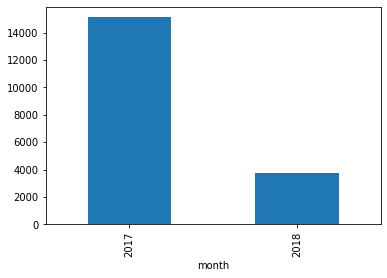

In [24]:
month = df.groupby(["month"])["id"].count()
month.plot(kind="bar")

Text(0.5, 1.0, 'Whale Sightings by Pod')

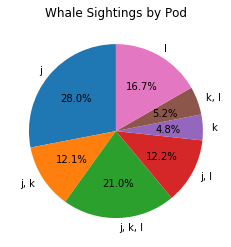

In [21]:
species = df.groupby(["orca_pod"])["id"].count()
species.plot(kind="pie", autopct="%1.1f%%", startangle = 90)
plt.ylabel("")
plt.title("Whale Sightings by Pod")